In [2]:
import pandas as pd
import os
from glob import glob
import linecache
from sklearn.model_selection import train_test_split
import pickle

In [2]:
path = os.getcwd()
print(path)

C:\home\program\test


In [3]:
categories = [name for name in os.listdir("ldcc-20140209.tar/text") if os.path.isdir("ldcc-20140209.tar/text/" + name)]
print(categories)

['dokujo-tsushin', 'it-life-hack', 'kaden-channel', 'livedoor-homme', 'movie-enter', 'peachy', 'smax', 'sports-watch', 'topic-news']


In [4]:
datasets = pd.DataFrame(columns=["title", "category"])
for cat in categories:
    path = "ldcc-20140209.tar/text/" + cat + "/*.txt"
    files = glob(path)
    for text_name in files:
        title = linecache.getline(text_name, 3)
        s = pd.Series([title, cat], index=datasets.columns)
        datasets = datasets.append(s, ignore_index=True)

In [5]:
# データフレームシャッフル
datasets = datasets.sample(frac=1).reset_index(drop=True)
datasets.head()

,title,category
0,二股をする気持ちもわかってしまう映画\n,movie-enter
1,【Sports Watch】長友の人生を変えた転機とは？\n,sports-watch
2,マット・デイモンの優しい眼差し、『幸せへのキセキ』のポスター公開\n,movie-enter
3,女子部必見！Peachyアプリが10万ダウンロードを突破\n,it-life-hack
4,ZOZOTOWNが東北地方太平洋沖地震災害支援のチャリティーTシャツを販売！\n,livedoor-homme


In [3]:
#datasets = pd.read_csv('Reuter_data/TITLE-category-split0-700.csv')
datasets = pd.read_csv('Reuter_data/NEWS-category-split0-700.csv')

In [4]:
for i in range(0,len(datasets)):
    text = datasets['NEWS'][i]
    try:
        if len(text) > 500:
            text = text[0:500]
    except AttributeError as t:
        text = 'aaaaaaaaaaaaa'
    datasets['NEWS'][i] = text

In [5]:
with open("Reuter_data/Reuter_NEWS-category.pickle", 'wb') as f:
    pickle.dump(datasets,f)

In [6]:
# データセット格納先
drive_dir = "Reuter_data/"

In [7]:
with open(drive_dir + "Reuter_NEWS-category.pickle", 'rb') as f:
    livedoor_data = pickle.load(f)

In [8]:
categories = list(set(livedoor_data['category']))
print(categories)

['oddlyEnoughNews', 'worldNews', 'technologyNews', 'sportsNews', 'domesticJPNews', 'entertainmentNews', 'business']


In [9]:
# カテゴリーのID辞書を作成
id2cat = dict(zip(list(range(len(categories))), categories))
cat2id = dict(zip(categories, list(range(len(categories)))))
print(id2cat)
print(cat2id)

{0: 'oddlyEnoughNews', 1: 'worldNews', 2: 'technologyNews', 3: 'sportsNews', 4: 'domesticJPNews', 5: 'entertainmentNews', 6: 'business'}
{'oddlyEnoughNews': 0, 'worldNews': 1, 'technologyNews': 2, 'sportsNews': 3, 'domesticJPNews': 4, 'entertainmentNews': 5, 'business': 6}


In [10]:
livedoor_data['category_id'] = livedoor_data['category'].map(cat2id)

In [11]:
livedoor_data = livedoor_data.sample(frac=1).reset_index(drop=True)

In [12]:
livedoor_data = livedoor_data[['NEWS', 'category_id']]
livedoor_data.head()

,NEWS,category_id
0,[［ニューヨーク ２５日 ロイター］ - ホンダ7267.Tはタカタ製の欠陥エアバッグ・イン...,6
1,[［ストックホルム １７日 ロイター］ - スウェーデンの人気ポップグループＡＢＢＡ（アバ）...,5
2,[［東京 ２１日 ロイター］ - 日銀が２１日の金融政策決定会合で決定した金融緩和のための新...,4
3,[［東京 ２９日 ロイター］ - 政府は２９日夕、経済財政諮問会議（議長：安倍晋三首相）を開...,4
4,[［東京 ４日 ロイター］ - 麻生太郎金融相は４日、かんぽ生命保険7181.Tの不適切販売...,4


In [13]:
train_df, test_df = train_test_split(livedoor_data, train_size=0.8)
print("学習データサイズ", train_df.shape[0])
print("テストデータサイズ", test_df.shape[0])

学習データサイズ 34737
テストデータサイズ 8685


In [14]:
train_df.to_csv(drive_dir+'train.tsv', sep='\t', index=False, header=None)
test_df.to_csv(drive_dir+'test.tsv', sep='\t', index=False, header=None)

In [15]:
import torch
import torchtext
from transformers.modeling_bert import BertModel
from transformers.tokenization_bert_japanese import BertJapaneseTokenizer

In [16]:
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [17]:
text = list(train_df['NEWS'])[0]
wakati_ids = tokenizer.encode(text, return_tensors='pt')
print(tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist()))
print(wakati_ids)
print(wakati_ids.size())

['[CLS]', '[[', '東京', '10', '日', 'ロイ', '##ター', ']', '-', '西村', '康', '稔', '経済', '再生', '相', 'は', '10', '日', 'の', '衆院', '予算', '委員', '会', 'で', '、', '引き続き', '政府', '・', '日銀', 'で', '連携', 'し', 'あらゆる', '政策', 'で', 'デフレ', '脱却', 'を', '目指す', 'と', '改めて', '強調', 'し', 'た', '。', '井', '##野', '俊', '##郎', '(', '自民', ')', '委員', 'へ', 'の', '答弁', '。', ',', '西村', '再生', '相', 'は', '「', 'アベ', '##ノミ', '##クス', 'の', '3', '本', 'の', '矢', 'により', 'デフレ', 'で', 'は', 'ない', '状態', 'を', '作り出す', 'こと', 'が', 'でき', 'た', '」', 'と', '述べ', '、', '具体', '例', 'として', '消費', '者', '物価', '指数', 'で', '基調', '的', 'な', '動き', 'を', '表す', 'コア', 'コア', '指数', '(', '生', '##鮮', '食品', 'および', 'エネルギー', 'を', '除く', '総合', '指数', ')', 'が', '26', '年', '連続', 'プラス', 'で', 'ある', 'こと', 'を', '示し', 'た', '。', 'もっとも', 'デフレ', 'から', '脱却', 'し', 'た', 'と', '判断', 'する', 'に', 'は', '「', 'デフレ', 'に', '戻る', '恐れ', 'が', 'ない', 'こと', 'を', '確認', 'する', '必要', 'が', 'ある', '」', 'と', '指摘', 'し', 'た', '。', ']', '[SEP]']
tensor([[    2, 11146,   391,   121,    32, 11756,    92,  4118,    61, 12817,
 

375


C:\home\anaconda\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NEWS', ylabel='Density'>

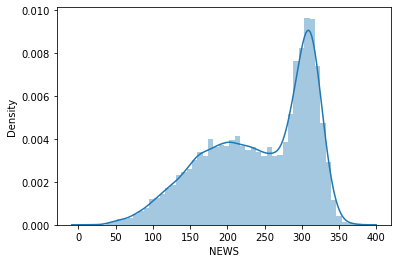

In [18]:
# 日本語BERTで扱える文章の長さは512だけど、livedoorニュースのタイトルの長さは最大でもCLS, SEPトークン入れても76
import seaborn as sns
title_length = livedoor_data['NEWS'].map(tokenizer.encode).map(len)
print(max(title_length))

sns.distplot(title_length)

In [19]:
def bert_tokenizer(text):
    return tokenizer.encode(text, return_tensors='pt')[0]

In [20]:
TEXT = torchtext.data.Field(sequential=True, tokenize=bert_tokenizer, use_vocab=False, lower=False,
                            include_lengths=True, batch_first=True, pad_token=0)
LABEL = torchtext.data.Field(sequential=False, use_vocab=False)

In [21]:
train_data, test_data = torchtext.data.TabularDataset.splits(
    path=drive_dir,train='train.tsv', test='test.tsv', format='tsv', fields=[('Text', TEXT), ('Label', LABEL)])

In [22]:
BATCH_SIZE = 32
train_iter, test_iter = torchtext.data.Iterator.splits(
    (train_data, test_data), batch_sizes=(BATCH_SIZE, BATCH_SIZE), repeat=False, sort=False)

In [23]:
model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')

In [24]:
# 上で作ったテストデータのイテレータから
batch = next(iter(test_iter))
print(batch.Text[0].size())

torch.Size([32, 334])


In [ ]:
# BERTの順伝搬時にoutput_attentions=TrueでAttention weightを取得できる
last_hidden_state, pooler_output, attentions = model(batch.Text[0], output_attentions=True)
print(last_hidden_state.size())
print(pooler_output.size())
print(len(attentions), attentions[-1].size())

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
class BertClassifier(nn.Module):
    def __init__(self):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
        # BERTの隠れ層の次元数は768, livedoorニュースのカテゴリ数が9
        self.linear = nn.Linear(768, 7)
        # 重み初期化処理
        nn.init.normal_(self.linear.weight, std=0.02)
        nn.init.normal_(self.linear.bias, 0)
    
    def forward(self, input_ids):
        # last_hidden_stateとattentionsを受け取る
        vec, _, attentions = self.bert(input_ids, output_attentions=True)
        # 先頭トークンclsのベクトルだけ取得
        vec = vec[:,0,:]
        vec = vec.view(-1, 768)
        # 全結合層でクラス分類用に次元を変換
        out = self.linear(vec)
        return F.log_softmax(out), attentions

classifier = BertClassifier()

In [ ]:
# まずは全部OFF
for param in classifier.parameters():
    param.requires_grad = False

# BERTの最後の層だけ更新ON
for param in classifier.bert.encoder.layer[-1].parameters():
    param.requires_grad = True

# クラス分類のところもON
for param in classifier.linear.parameters():
    param.requires_grad = True

In [ ]:
import torch.optim as optim

# 事前学習済の箇所は学習率小さめ、最後の全結合層は大きめにする。
optimizer = optim.Adam([
    {'params': classifier.bert.encoder.layer[-1].parameters(), 'lr': 5e-5},
    {'params': classifier.linear.parameters(), 'lr': 1e-4}
])

In [ ]:
# 損失関数の設定
loss_function = nn.NLLLoss()

In [ ]:
for epoch in range(5):
    all_loss = 0
    for idx, batch in enumerate(train_iter):
        batch_loss = 0
        classifier.zero_grad()
        input_ids = batch.Text[0]
        label_ids = batch.Label
        out, _ = classifier(input_ids)
        batch_loss = loss_function(out, label_ids)
        batch_loss.backward()
        optimizer.step()
        all_loss += batch_loss.item()
    print("epoch", epoch, "\t" , "loss", all_loss)

In [31]:
from sklearn.metrics import classification_report

answer = []
prediction = []
with torch.no_grad():
    for batch in test_iter:

        text_tensor = batch.Text[0]
        label_tensor = batch.Label

        score, _ = classifier(text_tensor)
        _, pred = torch.max(score, 1)

        prediction += list(pred.numpy())
        answer += list(label_tensor.numpy())
print(classification_report(prediction, answer, target_names=categories))

C:\home\anaconda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


                   precision    recall  f1-score   support

   domesticJPNews       1.00      0.89      0.94      1611
       sportsNews       1.00      0.99      0.99      1213
entertainmentNews       1.00      1.00      1.00      1354
   technologyNews       0.88      0.86      0.87      1269
  oddlyEnoughNews       1.00      1.00      1.00      1361
         business       0.85      0.88      0.87      1270
        worldNews       0.87      1.00      0.93      1149

         accuracy                           0.94      9227
        macro avg       0.94      0.95      0.94      9227
     weighted avg       0.95      0.94      0.94      9227



In [43]:
batch.Label

tensor([3, 0, 1, 6])